# Load libraries

In [1]:
%matplotlib inline

import os
import math

import configparser

import numpy as np
import pandas as pd
import matplotlib.pylab as plt

import sys
sys.path.append('../..')

from scripps.utils import read_datasets, norm1d, bayesian_linear_regression

# Load all mark2cure citizen scientist annotations

In [2]:
CF = read_datasets.get_configuration()

def read_disease_annotations():
    annotations = pd.DataFrame()
    anno = read_datasets.load_dataset('m2c_citizen_disease', 'files1')
    anno[3].replace(['I-Disease', 'O'], [1, 0], inplace=True)
    annotations = pd.concat([annotations, anno[0].rename('Token')], axis=1)
    annotations = pd.concat([annotations, anno[3].rename('Annotator1')], axis=1)
    for i in range(2, 6):
        anno = read_datasets.load_dataset('m2c_citizen_disease', 'files{}'.format(i))
        anno[3].replace(['I-Disease', 'O'], [1, 0], inplace=True)
        annotations = pd.concat([annotations, anno[3].rename('Annotator{}'.format(i))], axis=1)
    return annotations

def read_phenotype_annotations():
    annotations = pd.DataFrame()
    anno = read_datasets.load_dataset('m2c_citizen_phenotype', 'files1')
    anno[3].replace(['I-Phenotype', 'O'], [1, 0], inplace=True)
    annotations = pd.concat([annotations, anno[0].rename('Token')], axis=1)
    annotations = pd.concat([annotations, anno[3].rename('Annotator1')], axis=1)
    for i in range(2, 6):
        anno = read_datasets.load_dataset('m2c_citizen_phenotype', 'files{}'.format(i))
        anno[3].replace(['I-Phenotype', 'O'], [1, 0], inplace=True)
        annotations = pd.concat([annotations, anno[3].rename('Annotator{}'.format(i))], axis=1)
    return annotations

In [3]:
disease_annotations = read_disease_annotations()
phenotype_annotations = read_phenotype_annotations()

# Exploring disease annotations

In [4]:
disease_annotations.loc[~disease_annotations[['Annotator1', 'Annotator2', 'Annotator3', 'Annotator4', 'Annotator5']].eq(disease_annotations.iloc[:, 1], axis=0).all(1)]

,Token,Annotator1,Annotator2,Annotator3,Annotator4,Annotator5
0,Haematuria,0,0,1,0,1
6,Haematuria,0,0,1,0,1
10,pain,0,0,1,0,0
17,aneurysm,0,1,1,1,1
38,aorto,0,1,1,1,1
39,-,0,1,1,1,1
40,left,0,1,1,1,1
41,renal,0,1,1,1,1
42,vein,0,1,1,1,1
43,fistula,0,1,1,1,1


# Explore phenotype annotations

In [5]:
phenotype_annotations.loc[~phenotype_annotations[['Annotator1', 'Annotator2', 'Annotator3', 'Annotator4', 'Annotator5']].eq(phenotype_annotations.iloc[:, 1], axis=0).all(1)]

,Token,Annotator1,Annotator2,Annotator3,Annotator4,Annotator5
2,abdominal,0,0,0,1,0
3,aortic,0,0,0,1,0
4,aneurysm,0,0,0,1,0
8,left,1,1,0,0,1
9,loin,1,1,0,1,1
15,abdominal,0,0,0,1,0
16,aortic,0,0,0,1,0
17,aneurysm,0,0,0,1,0
26,poorly,0,0,0,1,1
27,or,0,0,0,1,1


In [48]:
def read_both_annotations():
    annotations = pd.DataFrame()
    anno = read_datasets.load_dataset('m2c', 'files1')
    anno[3].replace(['I-?', 'I-Disease_Phen'], ['O', 'I-Disease_Pheno'], inplace=True)
    annotations = pd.concat([annotations, anno[0].rename('Token')], axis=1)
    annotations = pd.concat([annotations, anno[3].rename('Annotator1')], axis=1)
    for i in range(2, 6):
        anno = read_datasets.load_dataset('m2c', 'files{}'.format(i))
        anno[3].replace(['I-?', 'I-Disease_Phen'], ['O', 'I-Disease_Pheno'], inplace=True)
        annotations = pd.concat([annotations, anno[3].rename('Annotator{}'.format(i))], axis=1)
    return annotations

In [58]:
z = read_both_annotations()

In [50]:
#z.loc[~z[['Annotator1', 'Annotator2', 'Annotator3', 'Annotator4', 'Annotator5']].eq(z.iloc[:, 1], axis=0).all(1)]

In [56]:
r = z[['Annotator1', 'Annotator2', 'Annotator3', 'Annotator4', 'Annotator5']] != 'O'
q = z[r.all(axis=1)]
q['Annotator5'].unique()

array(['I-Disease_Pheno', 'I-Disease', 'I-Phenotype'], dtype=object)

In [60]:
z[z['Annotator1'] == 'I-Gene']

,Token,Annotator1,Annotator2,Annotator3,Annotator4,Annotator5
7525,TLR4,I-Gene,O,O,O,O


In [61]:
import seaborn as sns
sns.set()

In [62]:
import matplotlib.pyplot as plt

In [63]:
tips = sns.load_dataset("tips")

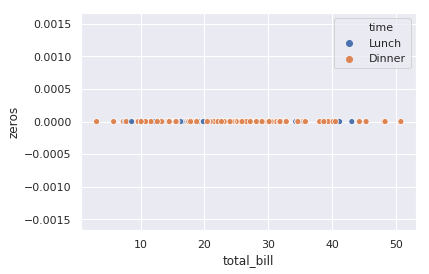

In [68]:
tips['zeros'] = 0
ax = sns.scatterplot(x="total_bill", y="zeros", hue="time", data=tips)